In [0]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df=pd.read_csv('/content/drive/My Drive/Projects/BikeSharingDaily.csv',parse_dates=True)

In [0]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [0]:
print('Start Date:',df.dteday.min())
print('End Date:',df.dteday.max())


Start Date: 2011-01-01
End Date: 2012-12-31


We have two year data of bike sharing

In [0]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [0]:
# lets check for null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [0]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


we have three dependent feature casual, registered and cnt
choose as per your requirement.

i will gonna take count features as a target variable

In [0]:
#lets do some EDA


General Hypothisis:

Hourly Trend : There must be high demand during office timings. Early morning and late evening can have different trend (cyclist) and low demand during 10:00 pm to 4:00 am.

Daily Trend : most of the registered members could be commuters where they only use week days

Seasons: there may be low demand of bikes in rainy days as compare to sunny, 

Humidity: demand of bikes may low beacause of High Humidity

Temperature: In india temperature is not highly correlated with bikes demand but for another country it can be an impactful feature.

Holiday : there is a minimum demand for bikes



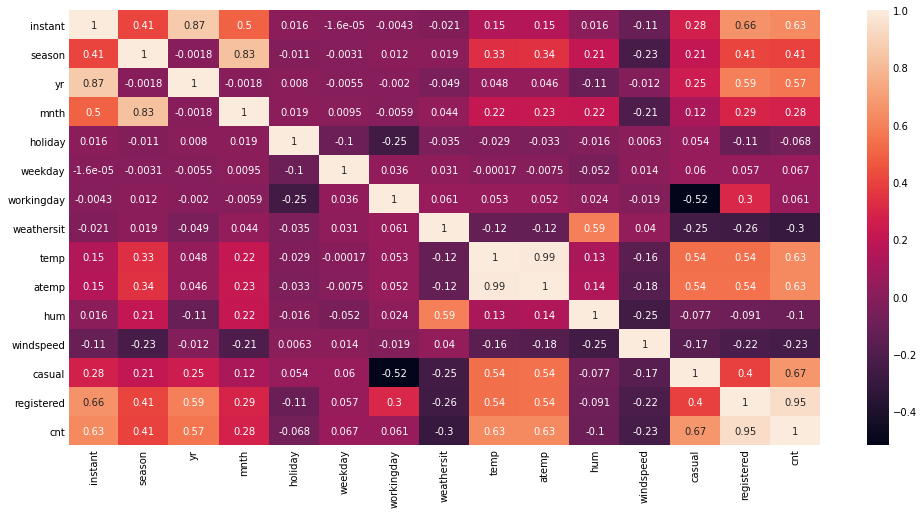

In [0]:
#first check correlation
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

We can see there is a highly correlated features like:

season is higly correlated with month, and temp is highly correlated with atemp

we will handle this in feature engineering stage


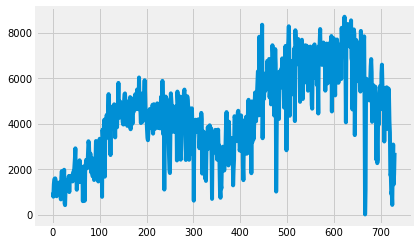

In [0]:
df['cnt'].plot()

We can observe there is an upward trend including seasonality parameter


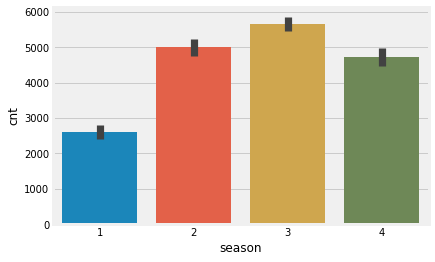

In [0]:
# season
sns.barplot(df['season'],df['cnt'])

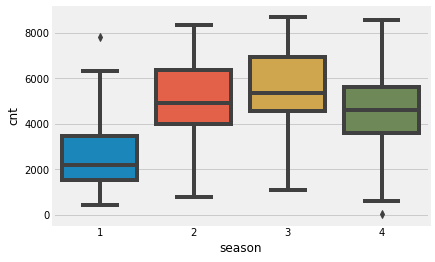

In [0]:
sns.boxplot(df['season'],df['cnt'])

we can see third season got more counts of bike sharing
and least are for the first season (rainy) as I have mentioned in general hypothisis

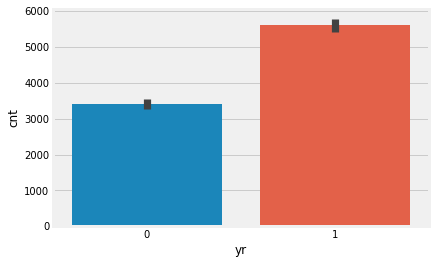

In [0]:
sns.barplot(df['yr'],df['cnt'])

if we will predict for next year then count of bikes sharing would be greater as compare to above plot.

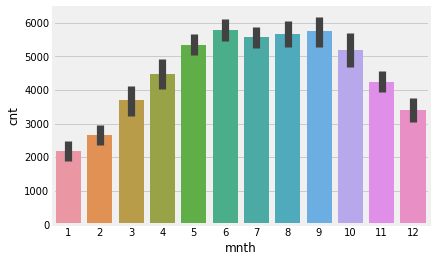

In [0]:
sns.barplot(df['mnth'],df['cnt'])

high demand of bikes are usually in between may-october

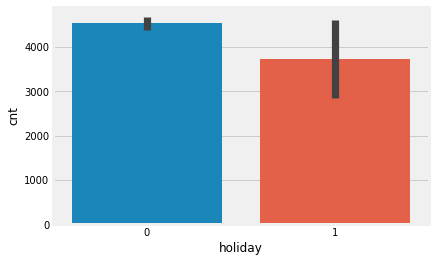

In [0]:
sns.barplot(df['holiday'],df['cnt'])

there is a little bit difference, in holidays bike demands low

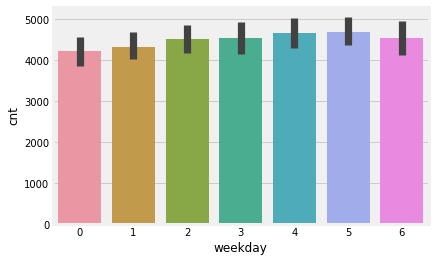

In [0]:
sns.barplot(df['weekday'],df['cnt'])

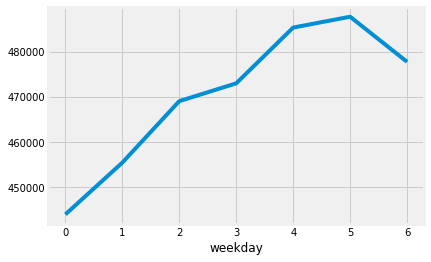

In [0]:
df.groupby('weekday')['cnt'].sum().plot()

we can see demand is increasing in weekdays and suddenly decrease on weekend.

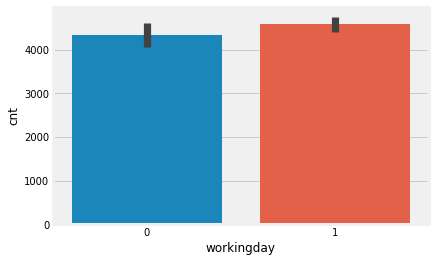

In [0]:
sns.barplot(df['workingday'],df['cnt'])

As we discuss above about no changes between working day and weekends

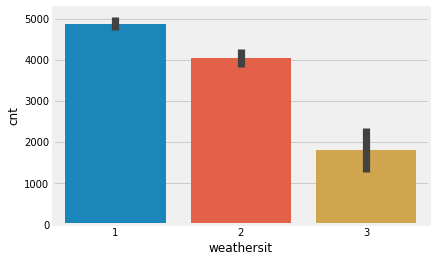

In [0]:
sns.barplot(df['weathersit'],df['cnt'])

1. Clear, Few clouds, Partly cloudy, Partly cloudy
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow and Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

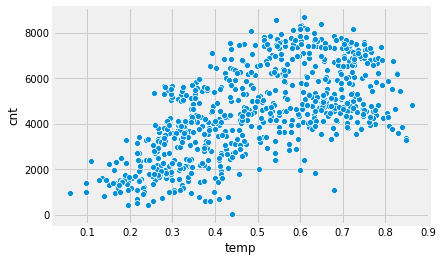

In [0]:
sns.scatterplot(df['temp'],df['cnt'])

as temperature increases bike demand also increases

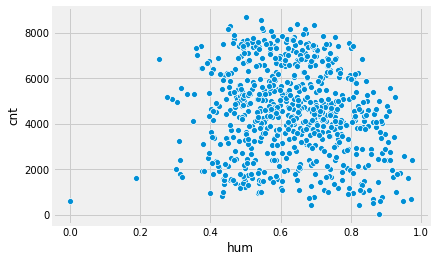

In [0]:
sns.scatterplot(df['hum'],df['cnt'])

we can see there is no significant relation in humidity and demands

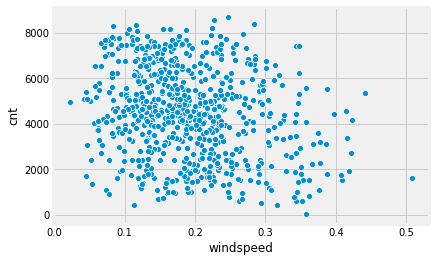

In [0]:
sns.scatterplot(df['windspeed'],df['cnt'])

we can see negative correlation between windspeed and bike demand

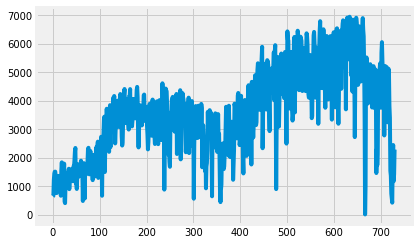

In [0]:
df['registered'].plot()

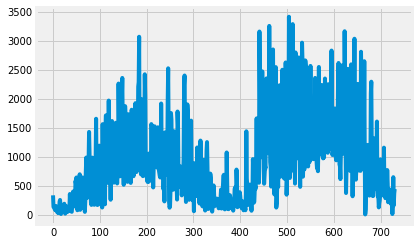

In [0]:
df['casual'].plot()

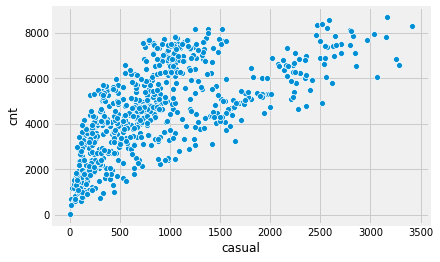

In [0]:
sns.scatterplot(df['casual'],df['cnt'])

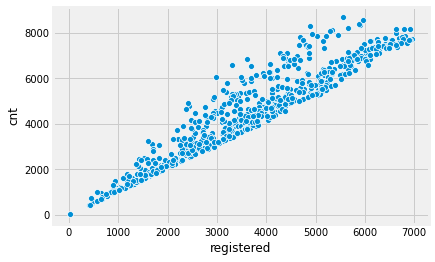

In [0]:
sns.scatterplot(df['registered'],df['cnt'])

Above you can see that registered users have similar trend as count. Whereas, casual users have different trend.

In [0]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [0]:
# create dummy variables for season and weather
season=pd.get_dummies(df['season'],drop_first=True)
weather=pd.get_dummies(df['weathersit'],drop_first=True)
df=pd.concat([df,season,weather],axis=1)


In [0]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,2,3,4,2,3
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0,0,0,1,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,0,0,0,1,0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0,0,0,0,0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0,0,0,0,0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,0,0,0,1,0
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,0,0,0,1,0
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,0,0,0,1,0
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,0,0,0,0,0


In [0]:
data=pd.get_dummies(data=df,columns=['season','weathersit'],drop_first=True)

In [0]:
# Remove dependent and redundant variables
data.drop(['instant','dteday','atemp','casual','registered'],axis=1,inplace=True)

In [0]:
X=data.drop('cnt',axis=1)
y=data['cnt']

In [0]:
# lets split data into training adnd testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE Score :',rmse)

RMSE Score : 806.9940370325315


In [0]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score



In [0]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor(),XGBRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor','XGboost Regressor']
rmse=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train.values,y_train)
    y_pred=clf.predict(X_test.values)
    rmse.append(np.sqrt(mean_squared_error(y_test,y_pred)))
d={'Algorithms':model_names,'RMSE_Score':rmse}   
d
 

[05:14:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'Algorithms': ['RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'SVR',
  'KNeighborsRegressor',
  'XGboost Regressor'],
 'RMSE_Score': [680.1653352813324,
  887.7626642197035,
  719.8713799516337,
  2010.1221495599457,
  1032.9326617982044,
  689.3382024183331]}

In [0]:

# lets do hypertuning of random forest regressor
from sklearn.model_selection import RandomizedSearchCV
model=RandomForestRegressor()

param={'n_estimators':[x for x in range(0,2000,200)],
       'max_depth':[5,8,10,15,25,30,35,40,50],
       'min_samples_split':[2,3,4,7,10,20,25,30,35],
       'min_samples_leaf':[1,2,3,5,8,10,15,20,25,30]}

randomcv=RandomizedSearchCV( model,param_distributions=param, n_iter=10)

In [0]:
randomcv.fit(X_train,y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                           

In [0]:
print(randomcv.best_score_)
print(randomcv.best_params_)

0.8485118553441593
{'n_estimators': 1600, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_depth': 50}


In [0]:
xgb=XGBRegressor()
param={'n_estimators':[x for x in range(0,2000,200)],
       'max_depth':[5,8,10,15,25,30,35,40,50],
       'learning_rate':[0.01,0.05,0.1,0.5,1,10]}

randomcv=RandomizedSearchCV( xgb,param_distributions=param, n_iter=10)

randomcv.fit(X_train.values,y_train)


[05:06:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:06:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:06:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:06:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:06:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:06:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:06:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:06:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alp...
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                                 

In [0]:
print(randomcv.best_score_)
print(randomcv.best_params_)

0.856317178697681
{'n_estimators': 1000, 'max_depth': 35, 'learning_rate': 0.1}


it seems good model as compare to Random Forest Regressor

In [0]:
#lets train final model
xgb=XGBRegressor(n_estimators= 1000, max_depth=35, learning_rate=0.1)
xgb.fit(X_train.values,y_train)
y_pred=xgb.predict(X_test.values)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

[05:16:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
666.1836205728849


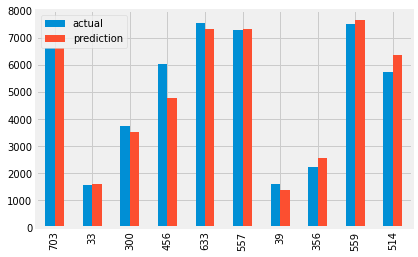

In [0]:
visualization=pd.DataFrame({'actual':y_test,'prediction':y_pred})
visualization[:10].plot(kind='bar')

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [0]:
model=Sequential()
model.add(Dense(1000,activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dense(800,activation='relu'))
model.add(Dense(600,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(400,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(1))

model.compile('adam',loss='mse')

In [0]:
history=model.fit(X_train.values,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=2)


Train on 584 samples, validate on 147 samples
Epoch 1/100
584/584 [==============================] - 2s 4ms/step - loss: 4893339.4822 - val_loss: 1144144.3996
Epoch 2/100
584/584 [==============================] - 2s 3ms/step - loss: 1812851.9606 - val_loss: 972373.4936
Epoch 3/100
584/584 [==============================] - 2s 3ms/step - loss: 1479482.2901 - val_loss: 1381899.4102
Epoch 4/100
584/584 [==============================] - 2s 3ms/step - loss: 1054814.7926 - val_loss: 958693.3615
Epoch 5/100
584/584 [==============================] - 2s 3ms/step - loss: 1202891.3568 - val_loss: 1375287.7160
Epoch 6/100
584/584 [==============================] - 2s 3ms/step - loss: 1101871.2622 - val_loss: 1434282.6609
Epoch 7/100
584/584 [==============================] - 2s 3ms/step - loss: 1193138.3296 - val_loss: 654879.4477
Epoch 8/100
584/584 [==============================] - 2s 3ms/step - loss: 1011768.9504 - val_loss: 725467.7143
Epoch 9/100
584/584 [==============================] -

In [0]:
y_pred=model.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse

801.4801540819622

XGboost Regressor is the best model suitable for our data still now.